# Assessment Review

### Student 1

In [1]:
# Import libraries - will need pandas, matplotlib, seaborn, and scipy's stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from scipy import stats

In [2]:
# Import the data - it's saved as 'auto-mpg.csv'
df = pd.read_csv("auto-mpg.csv")

In [3]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [5]:
# Describe our data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# Drop the 'car name' and model year columns, for simplicity
df.drop(columns=['model year', 'car name'], inplace=True)

## Hypothesis Testing

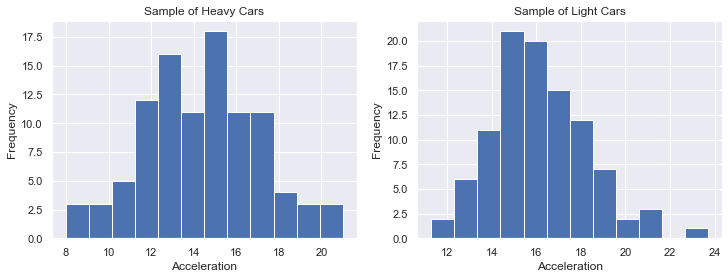

In [7]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### Student 2

Car manufacturers want to know if light cars accelerate faster than heavy cars.

Set up the null and alternative hypotheses for this test:

In [8]:
'''
Null hypothesis:

Alternative hypothesis:
'''

#Ho - light cars accelerate either slower than or equal to heavy cars
#Ha - light cars accelerate faster than heavy cars

'\nNull hypothesis:\n\nAlternative hypothesis:\n'

### Student 3

In [9]:
# Now test it! Use alpha = 0.05 and assume the samples have equal variance

print(stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration']))

Ttest_indResult(statistic=5.00874014469676, pvalue=1.2096440668168987e-06)


### Student 4

In [10]:
'''
Analyze your results - can you reject the null hypothesis?
'''

# P-value is 1.2 x 10^-6 - very small! Smaller than .05
# We can reject the null hypothesis

'\nAnalyze your results - can you reject the null hypothesis?\n'

## Ordinary Least Squares Regression Practice

Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. Sounds like a regression problem! But first let's further explore the data.

### Student 5

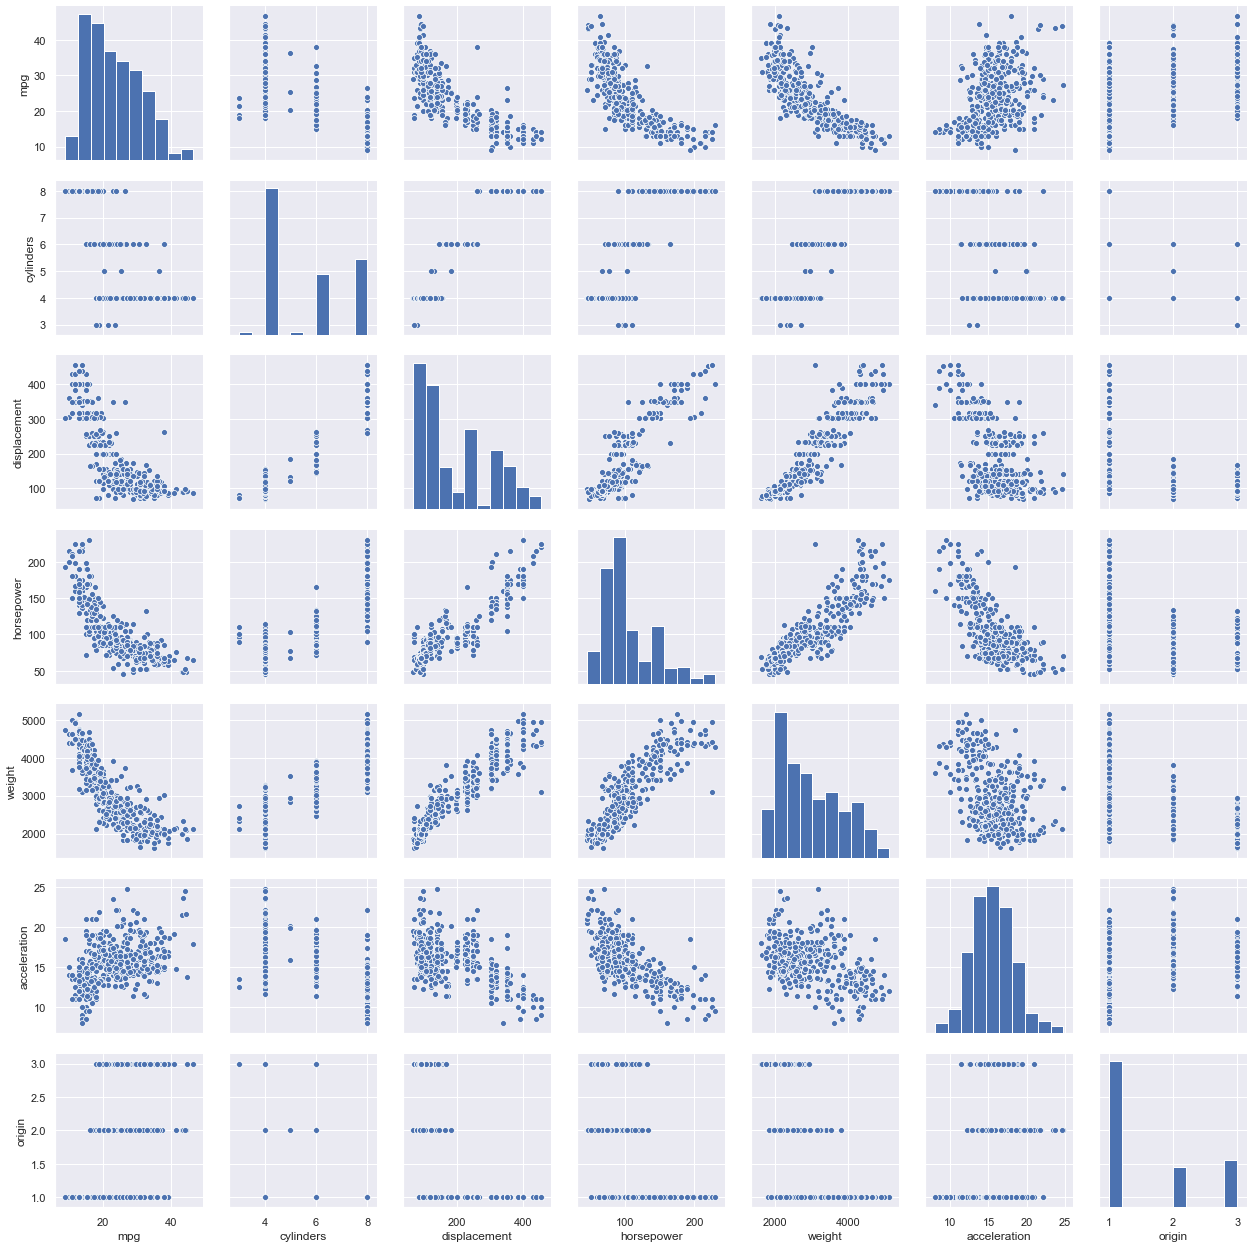

In [11]:
# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables
sns.pairplot(df)
plt.show()

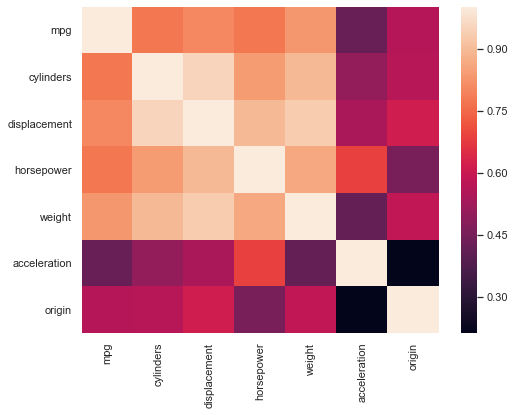

In [12]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function
# Use .abs to grab the absolute value of the correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr().abs())
plt.show()

### Student 6

Let's discuss these variables, looking both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

In [13]:
'''
Analyze the relationships between variables here
'''

# Some variables are correlated with the target - especially displacement,
# horsepower and weight. But these columns are also obviously correlated
# with each other as well
# Most of the data is not normally distributed, except acceleration
# A few categorical columns - origin, cylinders, could also count model year

'\nAnalyze the relationships between variables here\n'

### Student 7

Going a step further - what do you want to do to prepare this data for a regression model? List at least two things you'd want to do before running a regression model using any of this data.

In [ ]:
'''
List at least two preparation steps here
'''

# Scale the data should be the most obvious first step
# Also - remove colinear features, transform non-normal data
# Someone may mention creating a train/test split for evaluation
# Could also further encode categorical features

### Student 8

There's one thing we really need to do before running a regression on this data. Perform this step below.

In [15]:
target = 'mpg'
used_cols = [c for c in df.columns.to_list() if c not in ['mpg']]

In [16]:
y = df[target]
X = df[used_cols]

In [23]:
# Code here
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=used_cols)

In [24]:
X_scaled

,cylinders,displacement,horsepower,weight,acceleration,origin
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0
...,...,...,...,...,...,...
387,0.2,0.186047,0.217391,0.333711,0.452381,0.0
388,0.2,0.074935,0.032609,0.146583,0.988095,0.5
389,0.2,0.173127,0.206522,0.193365,0.214286,0.0
390,0.2,0.134367,0.179348,0.286929,0.630952,0.0


### Student 9

Now it's time to run a simple linear regression model! Using statsmodels' OLS function, imported below, pick a single variable to run and evaluate the result.

In [25]:
# Importing statsmodels' OLS function
import statsmodels.api as sm
# From Bryan's notebook, might be helpful: 
# https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

In [37]:
# Code here for single variable regression model plus a summary output
model = sm.OLS(y, X_scaled['acceleration'])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              2820.
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                   7.30e-181
Time:                        18:15:09   Log-Likelihood:                         -1400.7
No. Observations:                 392   AIC:                                      2803.
Df Residuals:                     391   BIC:                                      2807.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
acceleration    48.4493      0.912     53.101      0.000      46.656      50.243
==============================================================================
Omnibus:                        1.771   Durbin-Watson:                   1.071
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.534
Skew:                          -0.102   Prob(JB):                        0.464
Kurtosis:                       3.229   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Student 10

In [ ]:
'''
Analysis here - how did we do? 
'''

# Cylinders: R2 = 0.412
# Displacement: R2 = 0.324
# Horsepower: R2 = 0.433
# Weight: R2 = 0.445
# Acceleration: R2 = 0.878
# Origin: R2 = 0.487

### All Students!

All together now... let's run a regression output for all of our independent variables!

In [35]:
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              824.7
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                   1.27e-216
Time:                        18:12:27   Log-Likelihood:                         -1298.7
No. Observations:                 392   AIC:                                      2609.
Df Residuals:                     386   BIC:                                      2633.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders        5.3685      3.209      1.673      0.095      -0.942      11.679
displacement     1.1197      5.836      0.192      0.848     -10.355      12.594
horsepower      33.6384      4.029      8.348      0.000      25.716      41.561
weight         -34.6888      4.419     -7.849      0.000     -43.378     -26.000
acceleration    45.0051      1.539     29.252      0.000      41.980      48.030
origin           7.3880      1.082      6.830      0.000       5.261       9.515
==============================================================================
Omnibus:                       14.055   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.501
Skew:                           0.227   Prob(JB):                     7.89e-06
Kurtosis:                       4.110   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''
Analysis here - how did we do? 

In this model, what are the most important variable(s)?
'''

# R2 = 0.928
# Acceleration, then weight and horsepower have the largest coefficients
# Point out that acceleration, weight, horsepower and origin have p-values = 0
# Aka the model believes they are the most statistically significant variables

### Further Practice

Do the same as above, but using selections of independent variables.

In [ ]:
# Code here

In [ ]:
'''
Analysis here 
'''

Can also do some of the other steps we listed above that may help improve our model! Use Bryan's notebook for reference!